In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
data=pd.read_csv("D:\\超市销售额预测\\archive\\supermarket_sales - Sheet1.csv")

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
import warnings
warnings.filterwarnings("ignore")#解决警报出现问题
plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

# 数据预处理，数据清洗

In [5]:
data.isnull().sum()
#查看有没有空值

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
data.info()
#可以看到：大部分列是object类型，销量、销售额、利润等列是数值型，这些列都不需要进行数据类型处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.duplicated().sum()
#查看是否有重复值

0

In [8]:
data.describe()
#从图中可以看出“total”,"cogs","gross income"有明显的异常值

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# 数据可视化

In [9]:
#探究单价的变化

In [10]:
plt.style.use("seaborn")

Text(0, 0.5, '商品的价格随数量的波动')

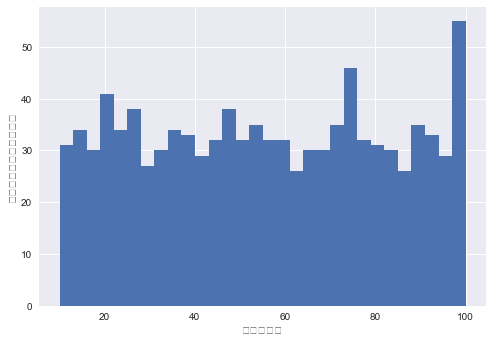

In [11]:
plt.hist(data["Unit price"],bins=30)
plt.xlabel("商品的价格")
plt.ylabel("商品的价格随数量的波动")

{'whiskers': [<matplotlib.lines.Line2D at 0x1a68064a2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a68064a970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6fffebf10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680657070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6806573d0>],
 'means': []}

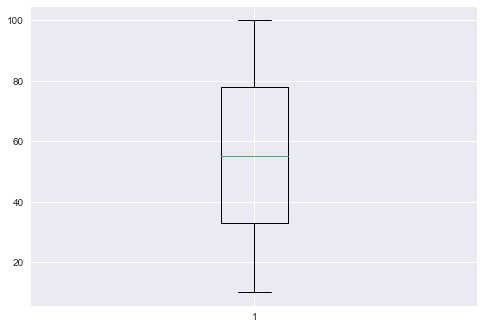

In [12]:
plt.boxplot(data["Unit price"])

Text(0, 0.5, '商品的数量的波动')

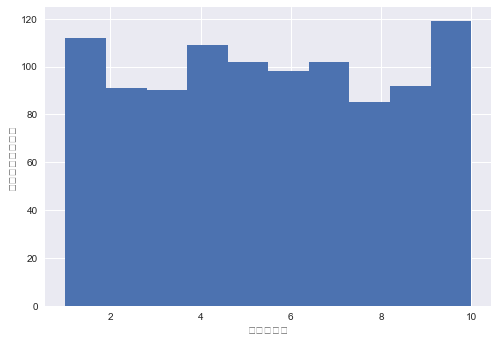

In [13]:
#探究超市销售数量的变化
plt.hist(data["Quantity"],bins=10)
plt.xlabel("商品的数量")
plt.ylabel("商品的数量的波动")
#从图中可以看出购买商品的数量区间为9-10的比较多

{'whiskers': [<matplotlib.lines.Line2D at 0x1a680714eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6807225b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a680714b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680722c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a680722fd0>],
 'means': []}

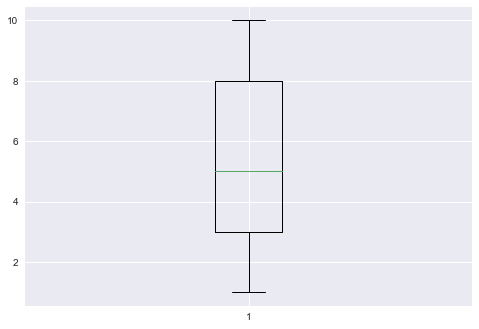

In [14]:
plt.boxplot(data["Quantity"])

In [15]:
#探究税率的变化

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6807c98b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6807c9f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6807c95e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6807d4670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6807d49d0>],
 'means': []}

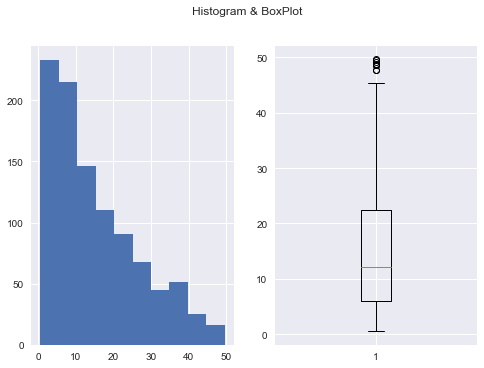

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.hist(data["Tax 5%"],bins=10)
ax2.boxplot(data["Tax 5%"])
#从图中可以看出有异常值

{'whiskers': [<matplotlib.lines.Line2D at 0x1a680885f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a680893610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a680885c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680893cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6808a0070>],
 'means': []}

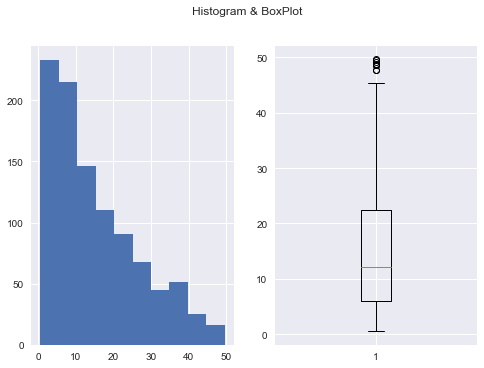

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.hist(data["Tax 5%"],bins=10)
ax2.boxplot(data["Tax 5%"])

In [18]:
#探究总价格的变化

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6809517c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a680951e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6809514f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680961580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6809618e0>],
 'means': []}

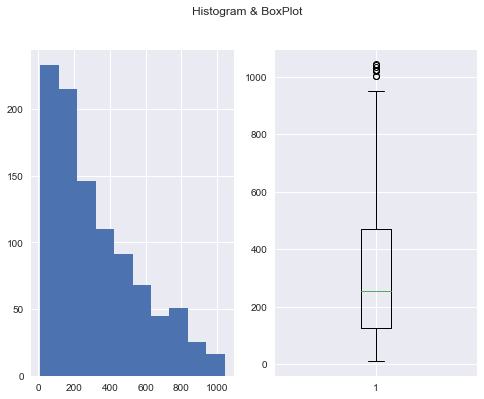

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,6))
fig.suptitle('Histogram & BoxPlot')
ax1.hist(data["Total"],bins=10)
ax2.boxplot(data["Total"])
#从图中可以看出有异常值

In [20]:
#探究cogs的变化

{'whiskers': [<matplotlib.lines.Line2D at 0x1a680a1f040>,
 'caps': [<matplotlib.lines.Line2D at 0x1a680a1f700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a680a10d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680a1fdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a680a29160>],
 'means': []}

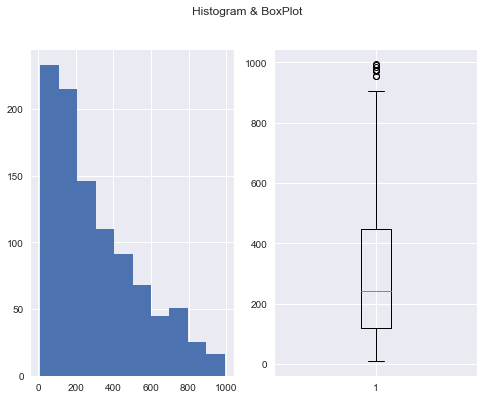

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,6))
fig.suptitle('Histogram & BoxPlot')
ax1.hist(data["cogs"],bins=10)
ax2.boxplot(data["cogs"])
#从图中可以看出有异常值

In [22]:
#探究rating的变化

{'whiskers': [<matplotlib.lines.Line2D at 0x1a680aeb880>,
 'caps': [<matplotlib.lines.Line2D at 0x1a680aebf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a680aeb5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680afa640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a680afa9a0>],
 'means': []}

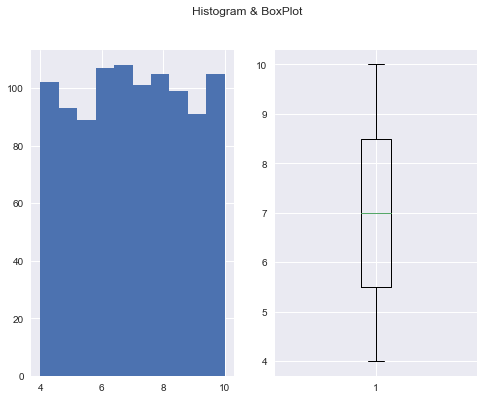

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,6))
fig.suptitle('Histogram & BoxPlot')
ax1.hist(data["Rating"],bins=10)
ax2.boxplot(data["Rating"])

In [24]:
#通过数据可视化直观的了解数据内容后，对发现的异常和问题数据进行数据再清洗，如下：

In [25]:
index_cogs = data[data['cogs'] > 3 * data['cogs'].std() + 100 ].index
data1 = data.drop(index_cogs, axis=0)

In [26]:
#当样本距离平均值大于3std时，认为该样本为异常值，所以筛选掉异常值

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6808f8700>,
 'caps': [<matplotlib.lines.Line2D at 0x1a68090d160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6808df910>],
 'medians': [<matplotlib.lines.Line2D at 0x1a68090ddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6806d61f0>],
 'means': []}

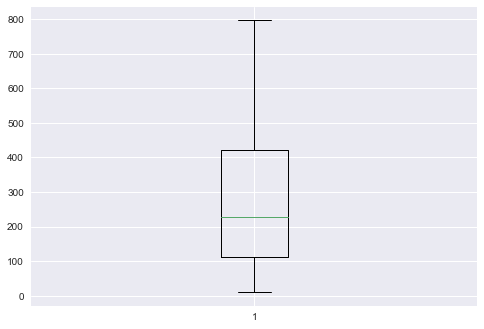

In [27]:
plt.boxplot(data1["cogs"])
#查看还有没有异常值

{'whiskers': [<matplotlib.lines.Line2D at 0x1a680b294f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a680b09850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6ffdb19a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a680a52bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a680b165b0>],
 'means': []}

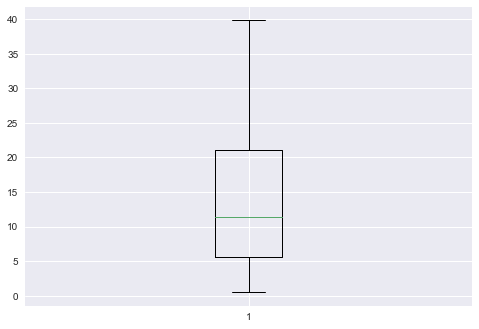

In [28]:
plt.boxplot(data1["Tax 5%"])
#都没有异常值

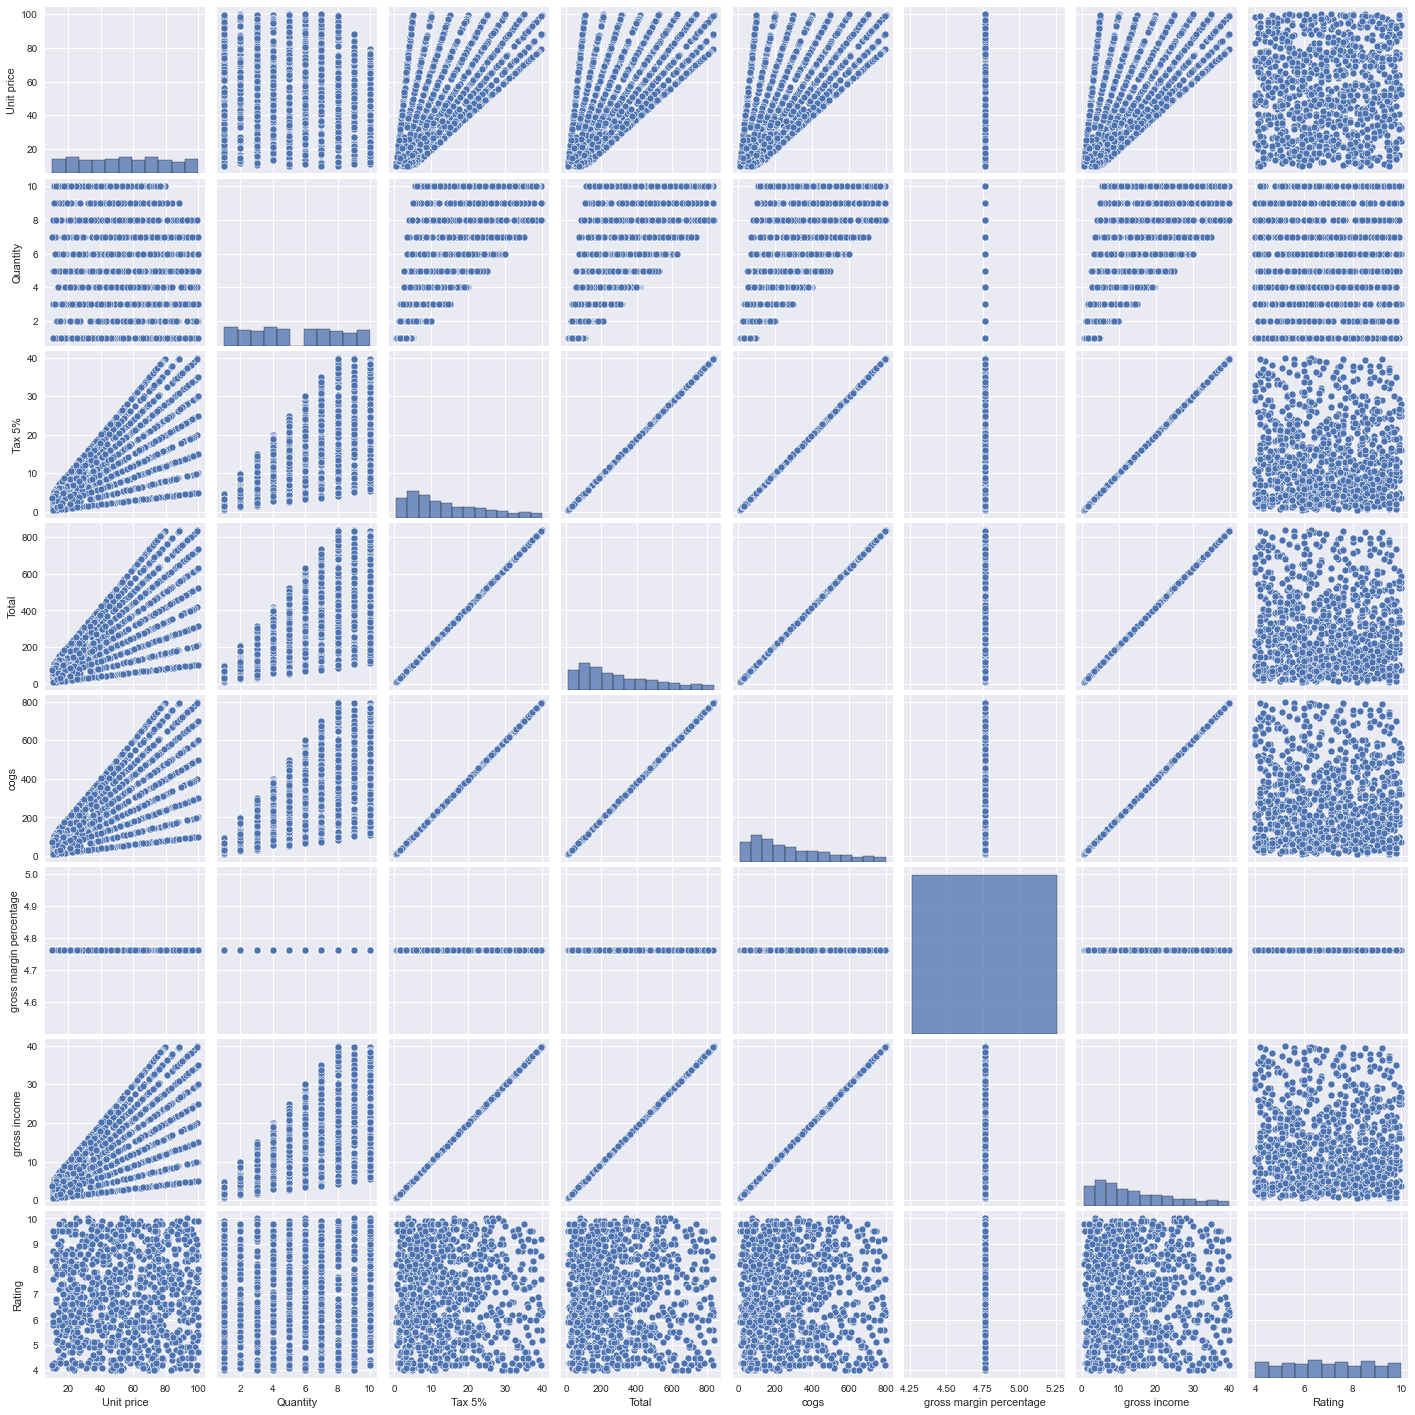

In [29]:
sns.pairplot(data1)
#pairplot函数可视化可以用于探索数据特征间的关系

<AxesSubplot:>

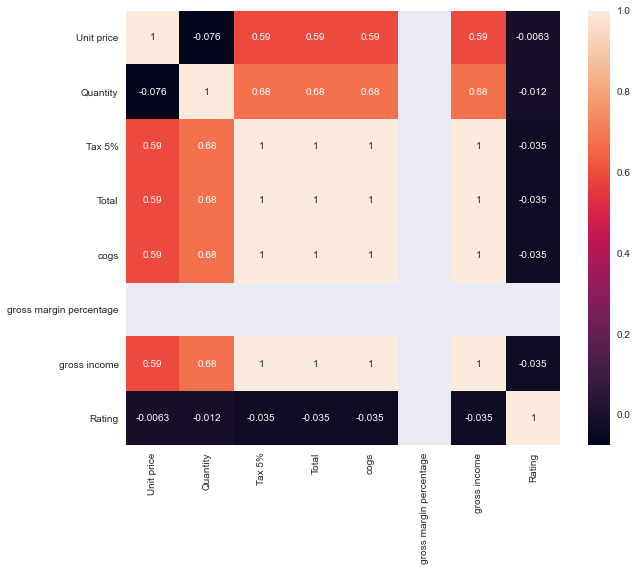

In [30]:
# 相关性分析
# 数值型数据分析
# 计算所有数值型特征与超市销售额之间的关系
corrmat=data1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,annot=True,square=True)

In [31]:
#探究订单数量与各个类别型特征之间的关系

In [32]:
data1["Product line"].value_counts()

Fashion accessories       172
Electronic accessories    166
Food and beverages        165
Sports and travel         158
Home and lifestyle        153
Health and beauty         146
Name: Product line, dtype: int64

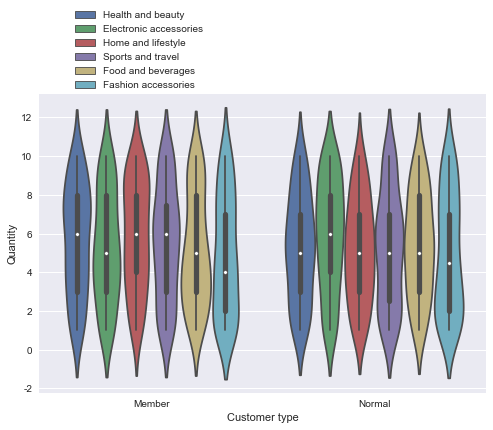

In [33]:
# plt.figure(figsize=(12,10))
sns.violinplot(x="Customer type",y='Quantity',data=data1,hue="Product line",col="City",scale_hue=True)
# plt.legend(loc="upper right")
plt.legend(loc=(0.07,1))

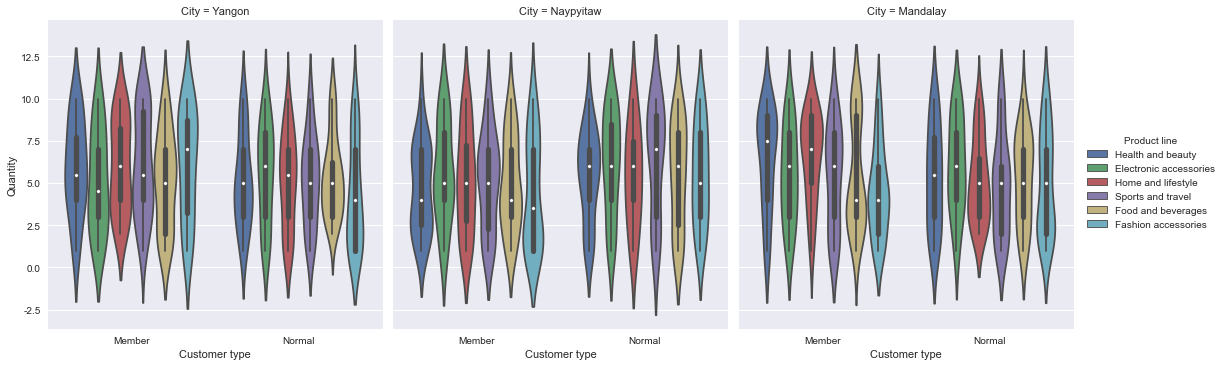

In [34]:
#生产线的小提琴图
sns.factorplot(x = 'Customer type', y = 'Quantity', hue='Product line', col = 'City', data=data1, kind='violin')

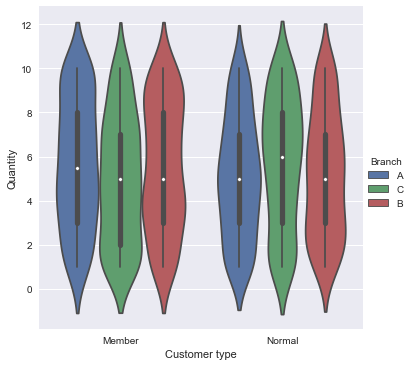

In [35]:
sns.factorplot(x = 'Customer type', y = 'Quantity', hue='Branch',data=data1, kind='violin')

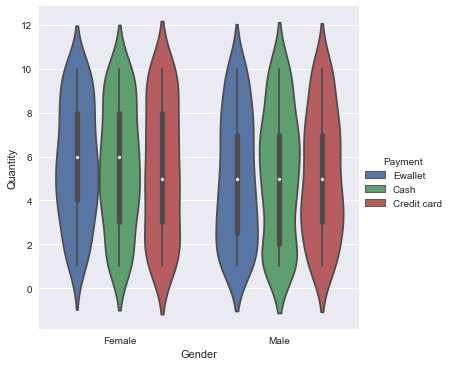

In [36]:
sns.factorplot(x = 'Gender', y = 'Quantity', hue='Payment',data=data1, kind='violin')
#探究性别与购买方式的不同

In [37]:
#探究销售量与城市的关系

In [38]:
city_quantity=data.groupby(["City"]).sum()

In [39]:
data["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [40]:
city_quantity.index

Index(['Mandalay', 'Naypyitaw', 'Yangon'], dtype='object', name='City')

([<matplotlib.patches.Wedge at 0x1a685aa9790>,
 [Text(0.5590275782441871, 0.9473585207103166, 'Mandalay'),
  Text(-1.0997280606941795, 0.0244579746058285, 'Naypyitaw'),
  Text(0.6356117330672433, -1.1340183970232829, 'Yangon')],
 [Text(0.3049241335877384, 0.5167410112965363, '33.0%'),
  Text(-0.5998516694695524, 0.013340713421360997, '33.2%'),
  Text(0.3911456818875343, -0.697857475091251, '33.7%')])

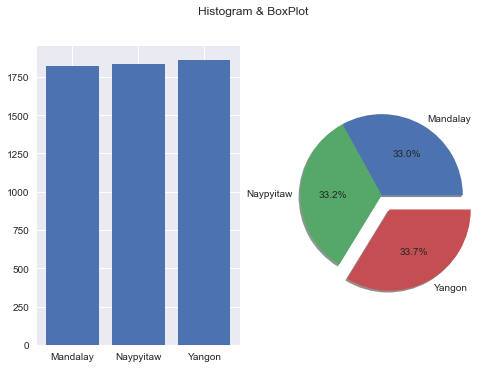

In [41]:
explo=[0.0,0.0,0.2]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.bar(city_quantity.index,city_quantity["Quantity"].values)
ax2.pie(city_quantity["Quantity"].values,labels=city_quantity.index,explode=explo,shadow=True,autopct='%1.1f%%')

In [42]:
#探究订单数量与时间的关系

In [43]:
data1["Date"]=pd.to_datetime(data["Date"])

In [44]:
data1["Month"]=data1["Date"].apply(lambda x:x.month)

In [45]:
data1["Month"].value_counts()

1    337
3    329
2    294
Name: Month, dtype: int64

In [46]:
data1["Hour"]=data1["Time"].apply(lambda x:x[:2])

In [47]:
hour=data1["Hour"].value_counts().sort_index()

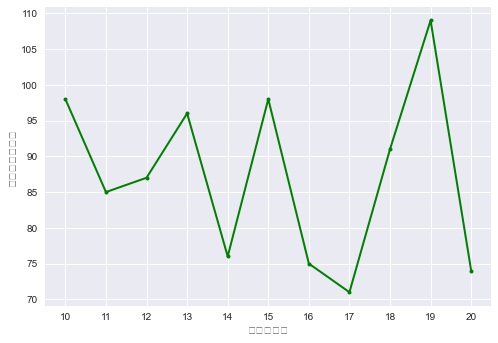

In [48]:
plt.plot(hour.index,hour.values,marker='.',markersize=8,color="green",linewidth=2,markeredgecolor='blue')
plt.xlabel("时间的变化")
plt.ylabel("订单数量的变化")
plt.show()
#从图中可以看出中午午饭过后超市订单购买量较多，五点是下班时间，购买量最少，午饭后大概7点的时间订单购买量最多

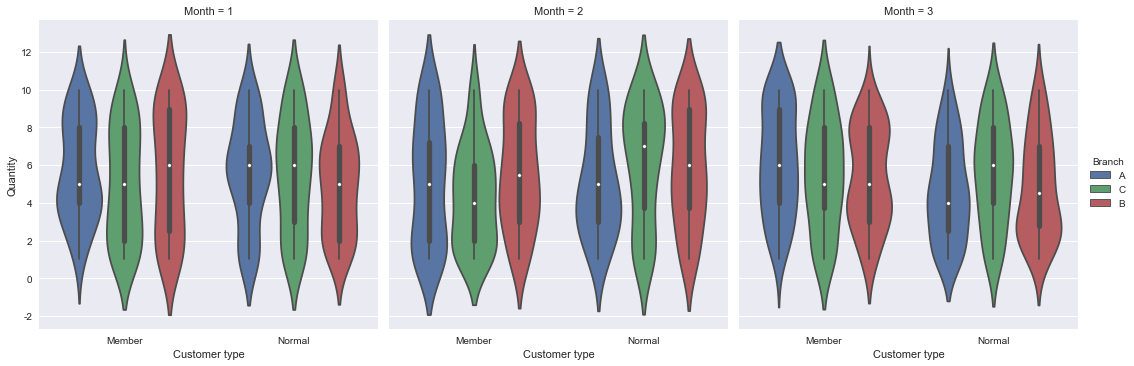

In [49]:
sns.factorplot(x = 'Customer type', y = 'Quantity', hue='Branch',col="Month",data=data1, kind='violin')

In [50]:
data1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10


In [51]:
data2=data1.sort_values(by="Date",axis=0)

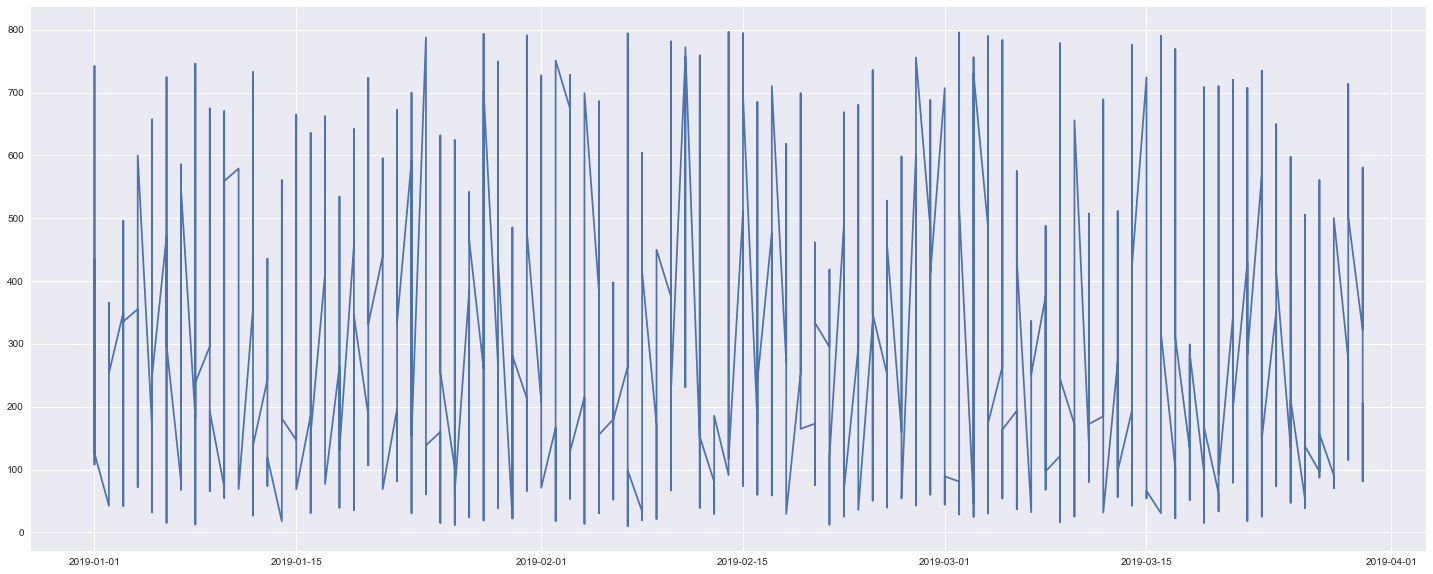

In [52]:
plt.figure(figsize=(25,10))
plt.plot(data2['Date'], data2['cogs'])
#这里是日期和销售成本的关系

# 时间序列预测

In [53]:
#序列平稳性预测

In [54]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX # 用于搭建时间序列分析模型：SARIMAX模型的库包

In [55]:
adfuller(data1["cogs"])
#测试的值小于显著水平的临界值，所以要拒绝零假设，所以是平稳时间序列

(-30.631136761318682,
 0.0,
 0,
 959,
 {'1%': -3.43718721587049,
  '5%': -2.8645585177815187,
  '10%': -2.568377225331392},
 12641.23415683483)

In [56]:
#对时间序列进行数据预处理

In [57]:
data1['cogs'] = np.log(data1['cogs'])#np.log（x）以e为底x为指数
adfuller(data2['cogs'])

(-30.38699236662674,
 0.0,
 0,
 959,
 {'1%': -3.43718721587049,
  '5%': -2.8645585177815187,
  '10%': -2.568377225331392},
 12653.73788148212)

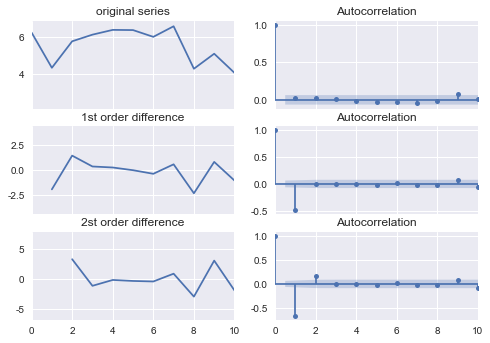

In [58]:
#建立模型，确定D
#d:使序列平稳所需的最小差分，如果时间序列已经固定，d=0,算一阶或者二阶，看出数据的离散程度
fig,axes=plt.subplots(3,2,sharex=True)
axes[0,0].plot(data1["cogs"])
axes[0,0].set_title("original series")
axes[0,0].set(xlim=(0,10))
plot_acf(data1["cogs"],ax=axes[0,1])
#1st differencing
axes[1,0].plot(data1["cogs"].diff())
axes[1,0].set_title("1st order difference")
axes[1,0].set(xlim=(0,10))
plot_acf(data1["cogs"].diff().dropna(),ax=axes[1,1])
#2nd differencing
axes[2,0].plot(data1["cogs"].diff().diff())
axes[2,0].set_title("2st order difference")
axes[2,0].set(xlim=(0,10))
plot_acf(data1["cogs"].diff().diff().dropna(),ax=axes[2,1])
plt.show()
#可以确定d=1

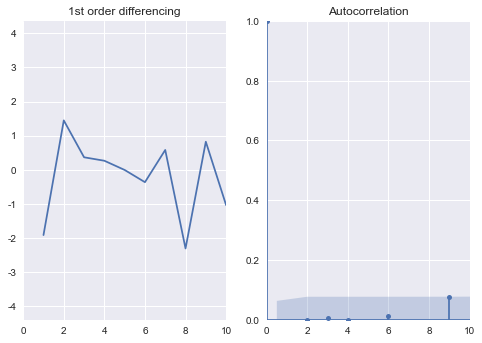

In [59]:
#确定AR项的阶数P
#p：自回归，表示预测变量的滞后次数
fig,axes=plt.subplots(1,2,sharex=True)
axes[0].plot(data1["cogs"].diff());axes[0].set_title("1st order differencing")
axes[1].set(ylim=(0,1),xlim=(0,10))
plot_acf(data1["cogs"].diff().dropna(),ax=axes[1])
plt.show()
#蓝色区域为显著性区间

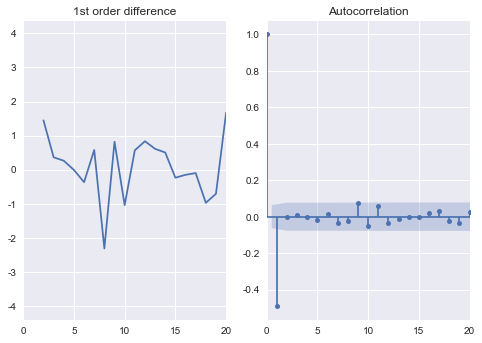

In [70]:
#确定MA向量的阶数 Q
#指应输入ARIMA模型的滞后预测误差的数量
fig,axes=plt.subplots(1,2,sharex=True)
axes[0].plot(data1["cogs"].diff());axes[0].set_title("1st order difference")
axes[1].set(xlim=(0,20))
plot_acf(data1["cogs"].diff().dropna(),ax=axes[1])
plt.show()

In [61]:
#p,d,q =3,1,3

In [62]:
data1["cogs1"]=data1["cogs"].diff()
data1= data1.dropna(axis=0)
adfuller(data1["cogs1"])

(-14.845257416411473,
 1.811407988458398e-27,
 15,
 943,
 {'1%': -3.437303541847512,
  '5%': -2.864609814371715,
  '10%': -2.5684045480287296},
 2507.24404619512)

In [75]:
m=SARIMAX(data1["cogs1"],order=(5,1,5),seasonal_order=(5,1,5,12))
res=m.fit()

C:\Users\emmal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\emmal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\emmal\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             cogs1   No. Observations:                  959
Model:             SARIMAX(4, 1, 4)x(4, 1, 4, 6)   Log Likelihood               -1280.280
Date:                           Tue, 06 Jul 2021   AIC                           2594.559
Time:                                   16:11:37   BIC                           2677.155
Sample:                                        0   HQIC                          2626.026
                                           - 959                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9181      0.052    -37.008      0.000      -2.020      -1.817
ar.L2         -0.9074      0.081    -11.271      0.000      -1.065      -0.750
ar.L3          0.0640      0.070      0.908      0.364      -0.074       0.202
ar.L4          0.0235      0.034      0.693      0.488      -0.043       0.090
ma.L1         -0.0446      0.040     -1.125      0.260      -0.122       0.033
ma.L2         -1.9083      0.041    -46.523      0.000      -1.989      -1.828
ma.L3         -0.0124      0.039     -0.316      0.752      -0.089       0.065
ma.L4          0.9658      0.038     25.395      0.000       0.891       1.040
ar.S.L6       -2.9265      0.077    -38.131      0.000      -3.077      -2.776
ar.S.L12      -2.9185      0.179    -16.344      0.000      -3.268      -2.568
ar.S.L18      -0.9956      0.139     -7.162      0.000      -1.268      -0.723
ar.S.L24      -0.0042      0.039     -0.107      0.914      -0.080       0.072
ma.S.L6        1.9127      0.283      6.751      0.000       1.357       2.468
ma.S.L12      -0.0275      0.811     -0.034      0.973      -1.617       1.562
ma.S.L18      -1.9137      0.815     -2.349      0.019      -3.511      -0.317
ma.S.L24      -0.9715      0.287     -3.384      0.001      -1.534      -0.409
sigma2         0.8078      0.233      3.460      0.001       0.350       1.265
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                45.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.53
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
data1["cogs1"]

1     -1.923274
2      1.445717
3      0.361971
4      0.260185
5     -0.010716
         ...   
994   -1.054161
995   -0.412462
997   -0.236868
998    0.726200
999    2.240179
Name: cogs1, Length: 959, dtype: float64

In [73]:
data1["predict_value"]=res.fittedvalues
#模型的预测值

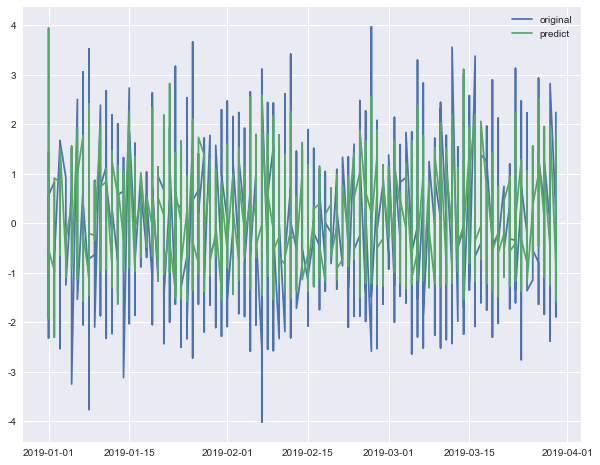

In [74]:
#将预测值跟真实值做比较
plt.figure(figsize=(10,8))
plt.plot(data1["Date"].sort_values(),data1["cogs1"],label="original")
plt.plot(data1["Date"].sort_values(),data1["predict_value"],label="predict")
plt.legend()

In [68]:
#预测未来
forecast=res.predict(start=len(data1),end=len(data1)+15)
#返回大小为15的数组
data1["cogs1"].append(forecast)

C:\Users\emmal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1     -1.923274
2      1.445717
3      0.361971
4      0.260185
5     -0.010716
         ...   
970   -0.152748
971    0.176551
972   -0.028082
973    0.058316
974   -0.066972
Length: 975, dtype: float64

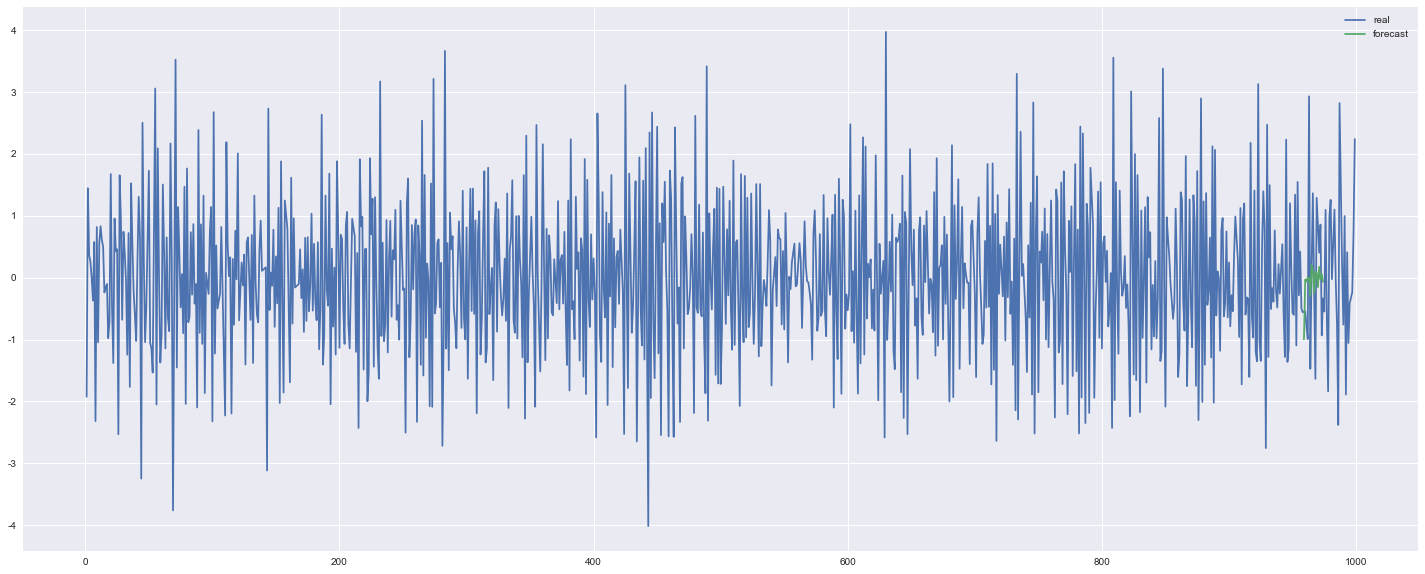

In [69]:
plt.figure(figsize=(25,10))
plt.plot(data1["cogs1"],label='real')
plt.plot(forecast,label="forecast")
plt.legend()